In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

In [2]:
df = pd.read_csv('data/df_train.csv')
df.head()

,Unnamed: 0,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,...,nbdisplayglobalapprox_1d_sum_xdevice,hashed_uid,hashed_xd_id,valueperclick,device_type,display_width,display_height,display_timestamp,is_display_clicked,zonecostineuro
0,0,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,74.0,0.0,127.0,...,23.000000,b'\x99w[\xb8\xe1\x9e\xbaz\x01\x06\x9c\xdc\x03\...,b'\xdb\xfc\xdfBY`$\x97\xf9\xaaGn\x98\xe0{RQ\x9...,0.529218,Android,0,0,1603150590,0,0.366238
1,1,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,0,web,1,74.0,0.0,127.0,...,98.252222,b'>\x1a\x00W\xb0\x81\x06\x00\x90\xc8\x8aL\xb4\...,b'\xe9\xcd\x80\xb5\x96\xcf8\x8eo(p-\x0f\xf4\xf...,0.269752,Desktop,0,0,1603150640,0,0.025551
2,2,2020-10-19,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...","b'\xbe\xa0?\xc2</,\xa4&w\x86\xe9\x150Y\xd4\xdf...",6,web,1,4.0,2.0,10.0,...,11.000000,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,0.095993,Android,640,150,1603150780,0,0.289000
3,3,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,73.0,1.0,127.0,...,57.000000,b'\xf2\x93e\xae\xadBh\x9f<<\x9e\xf0\x91q\xba\x...,"b'\x83u\xce\x10n\x9f\x10hP\x0cI\xdb \xed\xa8,E...",0.269752,iPhone,2,2,1603150840,0,0.243945
4,4,2020-10-19,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,8,app_ios,2,74.0,0.0,127.0,...,2.000000,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,0.136416,iPhone,0,0,1603149970,0,0.647304


In [3]:
# Shuffling
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
pd.DataFrame({"Valeurs manquantes":df.isnull().sum(), "Proportion manquante":df.isnull().sum()/len(df)})

,Valeurs manquantes,Proportion manquante
Unnamed: 0,0,0.000000
day,0,0.000000
hashed_partner_id,0,0.000000
hashed_campaign_id,0,0.000000
contextid,0,0.000000
display_env,0,0.000000
target_env,0,0.000000
rtbtypeid,9066,0.004887
rtbadvisibility,9066,0.004887
rtb_detectedlanguage,9066,0.004887


In [5]:
df['display_size'] = df['display_width']*df['display_height']

In [6]:
df_acp = df[['campaignctrlast24h','dayssincelastvisitdouble','nbdayssincelastclick','nbdisplay_1hour','nbdisplayglobalapprox_1d_sum_xdevice','valueperclick','display_size','zonecostineuro']]
df_acp = df_acp.dropna()

In [7]:
sc = StandardScaler()
Z = sc.fit_transform(df_acp)
Z

array([[-8.27213081e-02,  2.78317379e-01, -4.24673324e-01, ...,
        -9.00110526e-01,  1.01005803e+00, -2.77565488e-01],
       [-5.56006693e-01, -3.63501115e-01, -4.24673324e-01, ...,
         8.04238721e-01, -8.86673059e-01,  1.49930160e-01],
       [ 5.07885166e-01, -4.39334522e-01, -4.24673324e-01, ...,
        -1.07252429e+00, -9.63745862e-02, -3.22892296e-01],
       ...,
       [ 1.93540684e+00, -3.83562761e-01, -3.54725009e-01, ...,
        -8.56702663e-01,  1.01005803e+00, -9.28949497e-02],
       [-4.84305702e-01, -3.07093394e-01, -1.91512273e-01, ...,
         9.90653717e-02, -8.86683596e-01, -3.62040782e-01],
       [-2.65447670e-01,  7.88309458e-04,  3.51574843e+00, ...,
         9.39879369e-02,  1.01005803e+00, -2.25370626e-01]])

In [8]:
acp = PCA(svd_solver='full')

In [9]:
# Calcul des coordonnées factorielles
coord = acp.fit_transform(Z)
# Vérification du nombre de composantes principales
print(acp.n_components_)

8


In [10]:
print(acp.explained_variance_ratio_)

[0.20878171 0.16108921 0.15493336 0.13662952 0.1119917  0.09590611
 0.08645423 0.04421416]


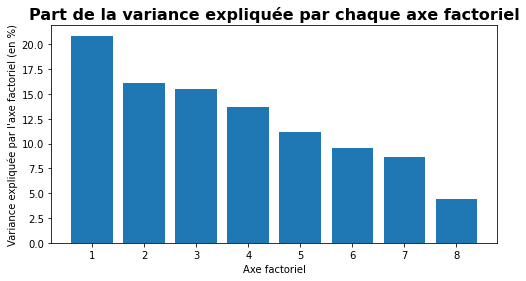

In [11]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_*100)
plt.title("Part de la variance expliquée par chaque axe factoriel", size=16, fontweight='bold')
plt.ylabel("Variance expliquée par l'axe factoriel (en %)", size=10)
plt.xlabel("Axe factoriel", size=10)
plt.show()

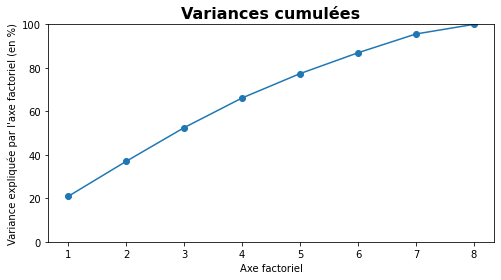

In [12]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_.cumsum()*100,  marker = 'o')
plt.title("Variances cumulées", size=16, fontweight='bold')
plt.ylim(0, 100)
plt.ylabel("Variance expliquée par l'axe factoriel (en %)", size=10)
plt.xlabel("Axe factoriel", size=10)
plt.show()

In [13]:
coord_not_cliqued = [ [] for _ in range(acp.n_components_)]
coord_cliqued = [ [] for _ in range(acp.n_components_)]

for i in range(len(coord[:,0])):
    if df['is_display_clicked'][i] == 0:
        for j in range(acp.n_components_):
            coord_not_cliqued[j].append(coord[i,j])
    else:
        for j in range(acp.n_components_):
            coord_cliqued[j].append(coord[i,j])

In [14]:
def affichage_plan_factoriel(i, j, pourcentage=1, equal=False, markersize=0.2, verbose=False):
    """
    pourcentage: proprotion de points à afficher
    equal: si True, autant de points rouges que de points verts
    """
    plt.figure(figsize=(10,6))

    if not equal:
        N_not = int(1/pourcentage)
        N = int(1/pourcentage)
    

    if equal:
        coeff = len(coord_cliqued[0]) / len(coord_not_cliqued[0])

        N_not = int(1/(pourcentage*coeff))
        N = int(1/pourcentage)

        # N_not = int(1/pourcentage)
        # N = int(coeff/pourcentage)

    if verbose:
        print(f"N_not : {N_not}")
        print(f"N : {N}")
        print(f"Nombre de points rouges : {len(coord_not_cliqued[0][::N_not])}")
        print(f"Nombre de points verts : {len(coord_cliqued[0][::N])}")

    plt.plot(coord_not_cliqued[i-1][::N_not], coord_not_cliqued[j-1][::N_not], '.', color='r', linestyle="None", markersize=markersize)
    plt.plot(coord_cliqued[i-1][::N], coord_cliqued[j-1][::N], '.', color='g', linestyle="None", markersize=markersize)
    plt.xlabel(f'Axe {i}')
    plt.ylabel(f'Axe {j}')
    plt.title(f'Plan (Axe {i}, Axe {j})')
    plt.legend(['Pas cliqué', 'Cliqué'])
    # plt.savefig('plan_axe1_axe2.png', dpi = 500, bbox_inches='tight', figsize=(10,6))
    # plt.close()
    plt.show()

N_not : 1
N : 1
Nombre de points rouges : 1536864
Nombre de points verts : 93353


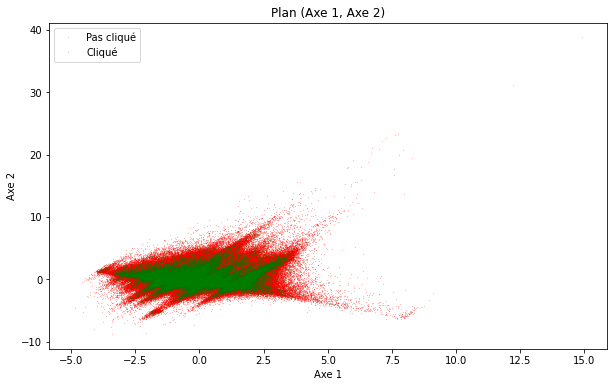

In [15]:
affichage_plan_factoriel(1, 2, verbose=True)

N_not : 10
N : 10
Nombre de points rouges : 153687
Nombre de points verts : 9336


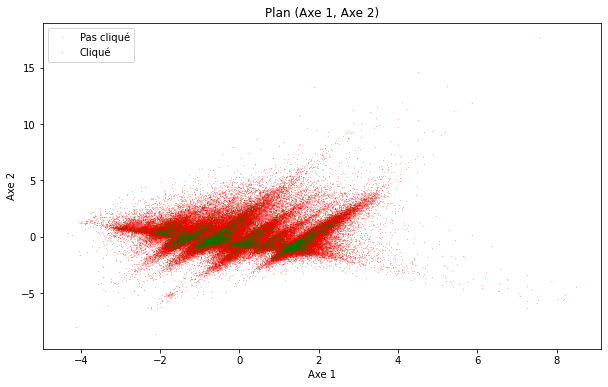

In [16]:
affichage_plan_factoriel(1, 2, pourcentage=0.1, verbose=True)

N_not : 329
N : 20
Nombre de points rouges : 4672
Nombre de points verts : 4668


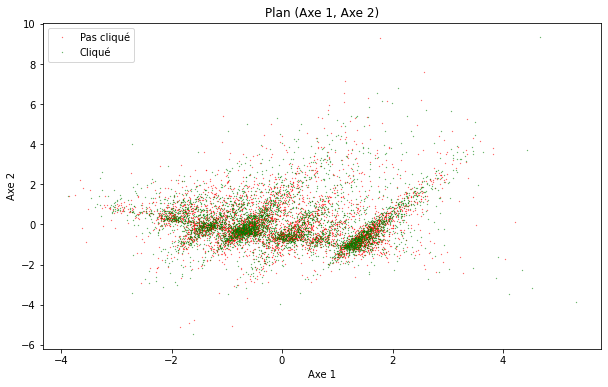

In [17]:
affichage_plan_factoriel(1, 2, pourcentage=0.05, equal=True, verbose=True, markersize=0.5)

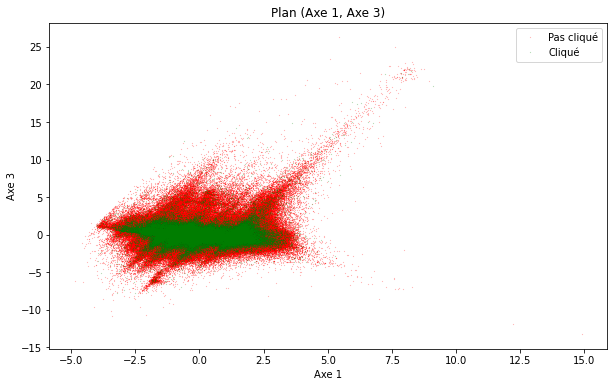

In [18]:
affichage_plan_factoriel(1, 3)

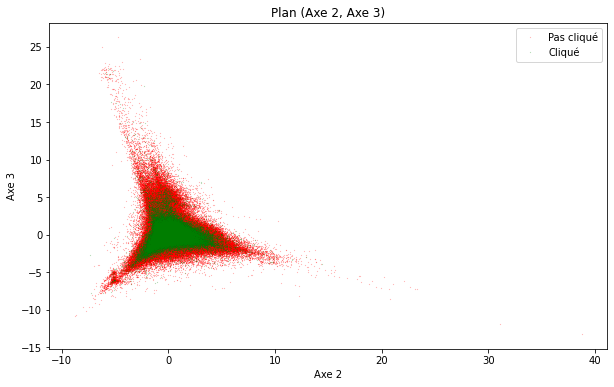

In [19]:
affichage_plan_factoriel(2, 3)

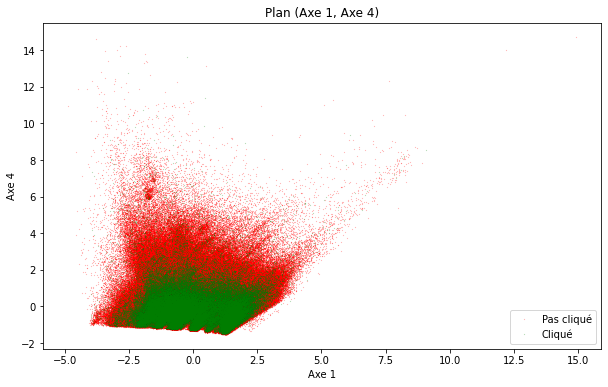

In [20]:
affichage_plan_factoriel(1, 4)

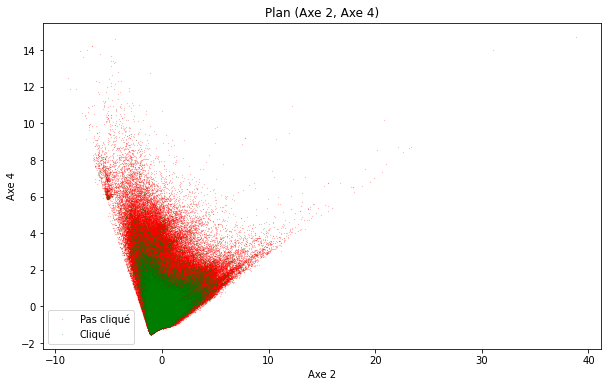

In [21]:
affichage_plan_factoriel(2, 4)

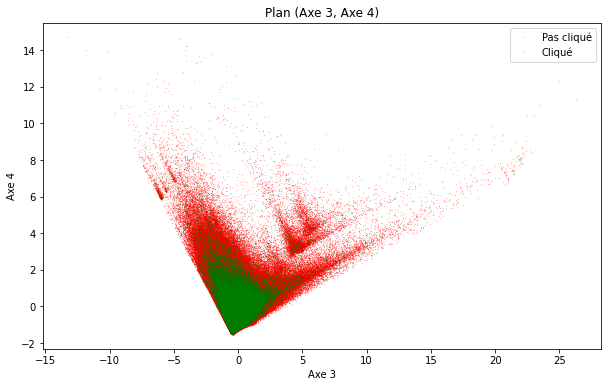

In [22]:
affichage_plan_factoriel(3, 4)

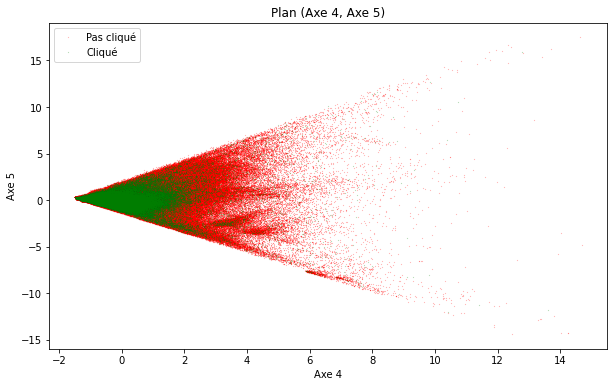

In [23]:
affichage_plan_factoriel(4, 5)

In [24]:
n = len(df_acp)
p = len(df_acp.columns)

eigval = (n-1)/n*acp.explained_variance_
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(pd.DataFrame({'Variable':df_acp.columns,'Cor_axe_1':corvar[:,0],'Cor_axe_2':corvar[:,1],'Cor_axe_3':corvar[:,2],'Cor_axe_4':corvar[:,3]}))

                               Variable  Cor_axe_1  Cor_axe_2  Cor_axe_3  \
0                    campaignctrlast24h  -0.779373   0.348772   0.281258   
1              dayssincelastvisitdouble  -0.169512  -0.348016  -0.433956   
2                  nbdayssincelastclick  -0.100087  -0.227639  -0.303920   
3                       nbdisplay_1hour   0.361765   0.672819  -0.108173   
4  nbdisplayglobalapprox_1d_sum_xdevice   0.265501   0.680351  -0.211632   
5                         valueperclick   0.865882  -0.225181  -0.031228   
6                          display_size   0.121300   0.009960   0.591904   
7                        zonecostineuro   0.241350  -0.166636   0.686921   

   Cor_axe_4  
0   0.032386  
1   0.526989  
2   0.600746  
3   0.221346  
4   0.251747  
5  -0.109207  
6   0.517940  
7   0.246608  


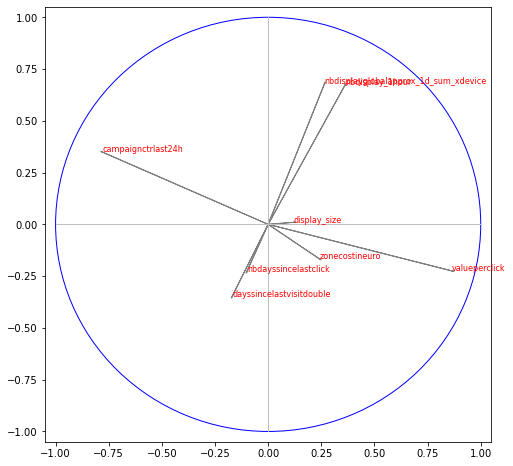

In [25]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1.05, 1.05)
axes.set_ylim(-1.05, 1.05)

for j in range(p):
    axes.arrow(0, 0, corvar[j,0], corvar[j,1], head_width=0.005, head_length=0.01, fc='grey', ec='grey')
    plt.annotate(df_acp.columns[j], (corvar[j,0],corvar[j,1]), size=8, color='r')

plt.plot([-1, 1], [0, 0],color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1],color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

plt.show()

In [26]:
def affichage_3d_factoriel(i, j, k, pourcentage=1, equal=False, markersize=1, verbose=False):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    if not equal:
        N_not = int(1/pourcentage)
        N = int(1/pourcentage)
    
    if equal:
        coeff = len(coord_cliqued[0]) / len(coord_not_cliqued[0])

        N_not = int(1/(pourcentage*coeff))
        N = int(1/pourcentage)

        # N_not = int(1/pourcentage)
        # N = int(coeff/pourcentage)

    if verbose:
        print(f"N_not : {N_not}")
        print(f"N : {N}")
        print(f"Nombre de points rouges : {len(coord_not_cliqued[0][::N_not])}")
        print(f"Nombre de points verts : {len(coord_cliqued[0][::N])}")

    ax.scatter(coord_not_cliqued[i-1][::N_not], coord_not_cliqued[j-1][::N_not], coord_not_cliqued[k-1][::N_not], s=markersize, color='r', linestyle="None", marker='o')
    ax.scatter(coord_cliqued[i-1][::N], coord_cliqued[j-1][::N], coord_cliqued[k-1][::N], s=markersize, color='g', linestyle="None", marker='o')
    ax.set_xlabel(f'Axe {i}')
    ax.set_ylabel(f'Axe {j}')
    ax.set_zlabel(f'Axe {k}')
    plt.title(f'Plan (Axe {i}, Axe {j}, Axe {k})')
    plt.legend(['Pas cliqué', 'Cliqué'])
    plt.show()

In [30]:
%matplotlib widget
affichage_3d_factoriel(1, 2, 3, pourcentage=0.01, equal=True, markersize=5, verbose=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

N_not : 1646
N : 100
Nombre de points rouges : 934
Nombre de points verts : 934
